# Multidimensional Scaling

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plotting style
%matplotlib inline
plt.style.use('seaborn')
#plt.rcParams['figure.facecolor'] = 'white'
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

In [8]:
N = 100 # number of data points
u = 3 + np.random.randn(N) # first feature dimension with mean = 3
v = 7 + np.random.randn(N) # second feature dimensions with mean = 7
X = np.hstack((u.reshape(-1,1),v.reshape(-1,1))) # 100 x 2 data matrix

In [9]:
# view first 5 rows and the column means
print(X[:5,:])

[[2.27140206 4.06918943]
 [2.35502279 7.81419656]
 [4.36375394 6.51078615]
 [2.06505282 8.38992431]
 [3.20967557 5.75270513]]


In [10]:
print('Column 1 mean: ', np.mean(X[:, 0]))
print('Column 2 mean: ', np.mean(X[:, 1]))

Column 1 mean:  3.249074786306812
Column 2 mean:  7.09004101928036


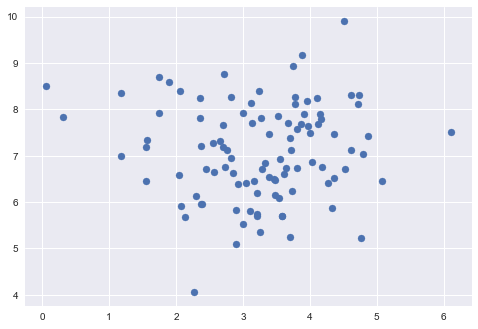

In [11]:
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.jet)
plt.show();

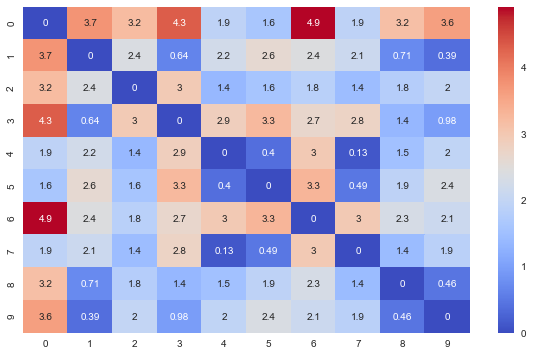

In [12]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.figure(figsize=(10,6))
sns.heatmap(D[:10, :10], cmap="coolwarm", annot=True);

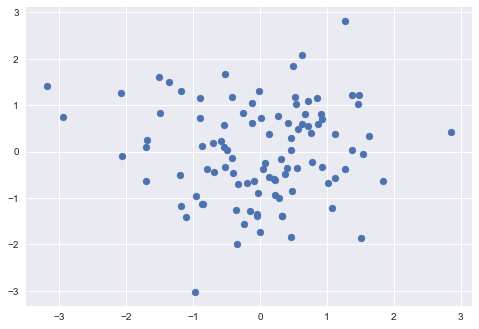

In [13]:
# function to form centering matrix
centering_matrix = lambda n: np.identity(n) -(1/n)*np.ones((n,n))
# multiply by data matrix X
X_centered = np.dot(centering_matrix(100), X)
# plot the centered data:
plt.scatter(X_centered[:, 0], X_centered[:, 1], cmap=plt.cm.jet)
plt.show();

In [14]:
# verify that the pairwise distances are unchanged
D_centered = pairwise_distances(X_centered)
np.allclose(D, D_centered)

True

## Classical MDS with Handwritten Digits

C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\GAO\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

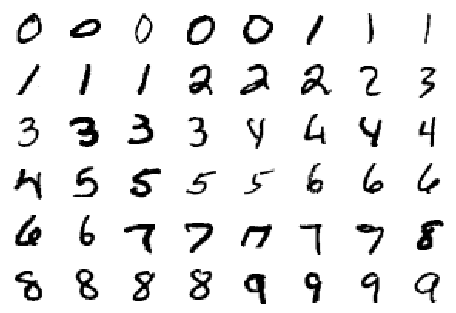

In [15]:
# import digits data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist['data']
y = mnist['target']
mnist.data.shape

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r');

In [16]:
def ClassicalMDS(dist_matrix, k):
    """Performs Classical Multidimensional Scaling
    Parameters
    ----------
    dist_matrix : Pairwise dissimilarity/distance matrix (n x n)
    k: Dimension of the output configuration
    
    Returns
    -------
    X : Matrix with columns as the output configuration vectors (k x n)
    """
    # get shape of distance matrix                                                                         
    n = dist_matrix.shape[0]
    
    # check distance matrix is symmetric
    if not np.allclose(np.transpose(dist_matrix),dist_matrix):
        print('Distance matrix must be symmetric')
        return
 
    # centering matrix
    C = np.identity(n) -(1/n)*np.ones((n,n))
 
    # compute gram matrix                                                                                    
    B = -(1/2)*C.dot(dist_matrix**2).dot(C)
 
    # solve for eigenvectors and eigenvalues and sort descending                                                   
    w, v = np.linalg.eigh(B)                                                  
    idx   = np.argsort(w)[::-1]
    eigvals = w[idx]
    eigvecs = v[:,idx]
     
    # select k largest eigenvalues and eigenvectors                      
    Lambda  = np.diag(np.sqrt(eigvals[:k]))
    V  = eigvecs[:,:k]
    X  = np.dot(Lambda, np.transpose(V))
    X = np.transpose(X)

    return X

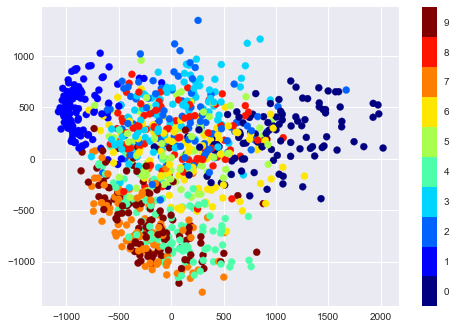

In [21]:
# get a subset of the mnist dataset
sample = np.random.permutation(mnist.data.shape[0])[:1000]
data = mnist.data[sample]
labels = mnist.target[sample]

# compute pairwise distance matrix with sklearn
D = pairwise_distances(data)

# plot results of MDS
X = ClassicalMDS(pairwise_distances(data), 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

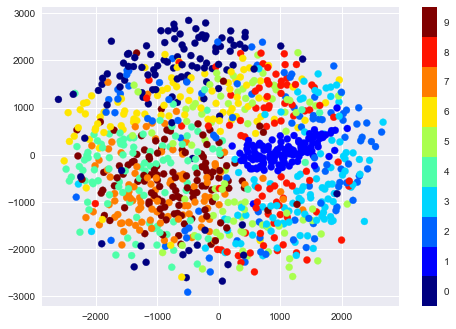

In [22]:
from sklearn.manifold import MDS

model = MDS(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);